In [1]:
# Imports básicos
import random
import matplotlib.pyplot as plt
import numpy as np
from src.ga_models import RouteGA

# Dados de exemplo: 10 cidades com coordenadas (simulando unidades hospitalares)
cities = {
    'Unidade_A': (0, 0), 'Unidade_B': (10, 5), 'Unidade_C': (15, 12),
    'Unidade_D': (7, 18), 'Unidade_E': (-3, 10), 'Unidade_F': (-8, -4),
    'Unidade_G': (5, -10), 'Unidade_H': (12, -7), 'Unidade_I': (-6, -1),
    'Unidade_J': (2, 8)
}

# Inicializar o algoritmo genético com as cidades
ga = RouteGA(cities)

# Exemplo de uso
print(f"Distância entre Unidade_A e Unidade_B: {ga.calculate_distance('Unidade_A', 'Unidade_B'):.2f}")

Distância entre Unidade_A e Unidade_B: 11.18


### 1.1. Representação Genética e Função de Aptidão (Fitness)

A base de qualquer algoritmo genético é a forma como uma solução é representada (o "cromossomo") e como sua qualidade é medida. Neste caso, uma rota é representada por uma lista ordenada dos pontos de entrega. A função de aptidão é a distância total da rota; quanto menor a distância, maior a aptidão da rota.

Distância da melhor rota inicial: 112.22
Geração 20/200: Melhor distância = 88.83
Geração 40/200: Melhor distância = 88.83
Geração 60/200: Melhor distância = 88.83
Geração 80/200: Melhor distância = 88.83
Geração 100/200: Melhor distância = 88.83
Geração 120/200: Melhor distância = 88.83
Geração 140/200: Melhor distância = 88.83
Geração 160/200: Melhor distância = 88.83
Geração 180/200: Melhor distância = 88.83
Geração 200/200: Melhor distância = 88.83

Algoritmo Genético Concluído! Melhor rota encontrada:
['Unidade_H', 'Unidade_G', 'Unidade_F', 'Unidade_I', 'Unidade_A', 'Unidade_J', 'Unidade_E', 'Unidade_D', 'Unidade_C', 'Unidade_B']
Distância total: 88.83


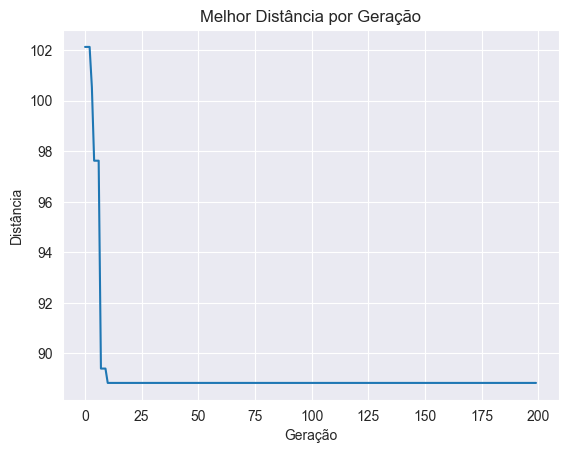

In [2]:
# --- Célula de Código 2: Executando o Algoritmo Genético Básico ---

# Parâmetros do Algoritmo Genético
POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.05

# 1. Cria a população inicial
population = ga.create_initial_population(POPULATION_SIZE)
print(f"Distância da melhor rota inicial: {ga.calculate_fitness(min(population, key=ga.calculate_fitness)):.2f}")

best_route_ever = None
best_distance_ever = float('inf')
history = []

# 2. Executa o loop do Algoritmo Genético
for gen in range(GENERATIONS):
    # a) Avaliação (calculada na seleção)
    # b) Seleção dos melhores cromossomos (pais)
    new_population = []

    # Elitismo: Mantém os 2 melhores cromossomos da geração anterior
    best_from_prev_gen = sorted(population, key=ga.calculate_fitness)[:2]
    new_population.extend(best_from_prev_gen)

    # c) Crossover e Mutação para criar a nova geração
    while len(new_population) < POPULATION_SIZE:
        parent1 = ga.tournament_selection(population)
        parent2 = ga.tournament_selection(population)
        child = ga.order_crossover(parent1, parent2)
        child = ga.swap_mutation(child, MUTATION_RATE)
        new_population.append(child)

    population = new_population

    # d) Acompanha o progresso
    current_best_route = min(population, key=ga.calculate_fitness)
    current_best_distance = ga.calculate_fitness(current_best_route)

    if current_best_distance < best_distance_ever:
        best_distance_ever = current_best_distance
        best_route_ever = current_best_route

    history.append(best_distance_ever)

    if (gen + 1) % 20 == 0:
        print(f"Geração {gen+1}/{GENERATIONS}: Melhor distância = {best_distance_ever:.2f}")

print(f"\nAlgoritmo Genético Concluído! Melhor rota encontrada:")
print(best_route_ever)
print(f"Distância total: {best_distance_ever:.2f}")

# Visualiza o histórico de fitness
plt.plot(history)
plt.title('Melhor Distância por Geração')
plt.xlabel('Geração')
plt.ylabel('Distância')
plt.show()

### 1. Adicionando Dados de Restrições e Múltiplos Veículos

Para expandir nosso algoritmo genético do Problema do Caixeiro Viajante (TSP) para um Problema de Roteamento de Veículos (VRP), precisamos de dados mais realistas. Nesta célula, definimos dados de exemplo que representam o contexto de um hospital:

* **`priorities`**: Um dicionário que atribui um nível de urgência a cada entrega.
* **`vehicles`**: Um dicionário que descreve a capacidade máxima de carga e a autonomia (distância máxima que pode percorrer) de cada veículo disponível para as entregas.
* **`demands`**: Um dicionário que especifica a quantidade (peso ou volume) de insumos que cada unidade hospitalar precisa.

Esses dados de restrição serão utilizados pela nova função de fitness para penalizar as rotas inviáveis e encontrar a melhor solução.

In [3]:
# --- Célula de Código 3: Dados de Exemplo para o VRP ---

# Prioridades de entrega (valores mais altos = maior prioridade)
priorities = {
    'Unidade_A': 10,  # Medicamentos críticos
    'Unidade_B': 5,
    'Unidade_C': 8,
    'Unidade_D': 2,
    'Unidade_E': 7,
    'Unidade_F': 1,   # Insumos regulares
    'Unidade_G': 9,
    'Unidade_H': 4,
    'Unidade_I': 6,
    'Unidade_J': 3
}

# Capacidade e Autonomia dos veículos
# A capacidade é a carga máxima, e a autonomia é a distância máxima
vehicles = {
    'Veiculo_1': {'capacity': 50, 'autonomy': 100},
    'Veiculo_2': {'capacity': 75, 'autonomy': 120},
    'Veiculo_3': {'capacity': 60, 'autonomy': 90}
}

# Demanda de carga em cada unidade (simulando peso dos insumos)
demands = {
    'Unidade_A': 15, 'Unidade_B': 10, 'Unidade_C': 25,
    'Unidade_D': 5,  'Unidade_E': 20, 'Unidade_F': 5,
    'Unidade_G': 30, 'Unidade_H': 10, 'Unidade_I': 15,
    'Unidade_J': 5
}

print("Dados de restrições para o VRP definidos com sucesso.")

Dados de restrições para o VRP definidos com sucesso.


### 2. Adaptando o Algoritmo Genético para o VRP

Esta é a parte mais crítica da transição de TSP para VRP. A classe `RouteVRP` herda a base do `RouteGA` mas aprimora sua lógica principal, especialmente a **função de fitness**.

A nova função `calculate_fitness` não apenas mede a distância total, mas também:
* **Avalia as Rotas por Veículo:** Para cada veículo, ela verifica se a rota atribuída viola as restrições.
* **Aplica Penalidades:** Penaliza severamente (`PENALTY_VIOLATION`) as rotas que excedem a capacidade de carga ou a autonomia dos veículos. Isso força o algoritmo genético a buscar soluções que respeitem essas restrições.
* **Soma os Custos:** O fitness final é a soma da distância total percorrida por todos os veículos, mais as penalidades por qualquer violação. O objetivo do algoritmo é minimizar este valor de fitness.

A lógica de múltiplos veículos é implementada na própria função de fitness, que tenta alocar a sequência de entregas em veículos até que todas as restrições sejam cumpridas.

In [4]:
# --- Célula de Código 4: Classe RouteVRP (versão final) ---
from src.ga_models import RouteGA

class RouteVRP(RouteGA):
    """
    Classe para implementar um Algoritmo Genético para o Problema de Roteamento de Veículos (VRP).
    Aprimora a classe RouteGA para incluir restrições realistas.
    """
    def __init__(self, cities, vehicles, demands, priorities):
        super().__init__(cities)
        self.vehicles = vehicles
        self.demands = demands
        self.priorities = priorities
        self.depot = self.city_names[0]  # Assumimos que o primeiro ponto é o depósito

    def calculate_fitness(self, route):
        """
        Calcula o fitness de uma rota (cromossomo) para o VRP,
        considerando distância total, capacidade e autonomia dos veículos.
        Esta função tenta alocar a rota em veículos e penaliza as violações.
        """
        PENALTY_VIOLATION = 1000000

        total_distance = 0
        total_penalty = 0

        vehicle_pool = list(self.vehicles.values())
        vehicle_pool_index = 0
        current_vehicle = vehicle_pool[vehicle_pool_index]
        current_load = 0
        current_distance = 0
        current_route_segment = []

        for i, city in enumerate(route):
            last_city = current_route_segment[-1] if current_route_segment else self.depot
            distance_to_city = self.calculate_distance(last_city, city)

            if (current_load + self.demands[city] > current_vehicle['capacity'] or
                current_distance + distance_to_city + self.calculate_distance(city, self.depot) > current_vehicle['autonomy']):

                total_distance += current_distance
                total_distance += self.calculate_distance(last_city, self.depot)

                vehicle_pool_index += 1
                if vehicle_pool_index < len(vehicle_pool):
                    current_vehicle = vehicle_pool[vehicle_pool_index]
                    current_load = 0
                    current_distance = 0
                    current_route_segment = []

                    total_distance += self.calculate_distance(self.depot, city)
                    current_load += self.demands[city]
                    current_distance += self.calculate_distance(self.depot, city)
                    current_route_segment.append(city)
                else:
                    total_penalty += PENALTY_VIOLATION * (len(route) - i)
                    break
            else:
                current_load += self.demands[city]
                current_distance += distance_to_city
                current_route_segment.append(city)

        if current_route_segment:
            total_distance += self.calculate_distance(current_route_segment[-1], self.depot)

        return total_distance + total_penalty

### 3. Executando o Algoritmo Genético do VRP

Nesta célula, o algoritmo genético para o VRP é executado com os dados e as restrições realistas que definimos. Os parâmetros como `POPULATION_SIZE`, `GENERATIONS` e `MUTATION_RATE` controlam o comportamento do algoritmo, influenciando a rapidez e a qualidade da solução encontrada.

O algoritmo segue um ciclo evolutivo de seleção, crossover e mutação por centenas de gerações, sempre acompanhando a melhor rota encontrada até o momento. Ao final da execução, ele nos fornece:

* A **melhor sequência de entregas** encontrada (que, quando interpretada, pode ser dividida em rotas para múltiplos veículos).
* A **distância total otimizada** (que inclui as penalidades).
* Um **gráfico de histórico** que mostra como o custo da melhor rota evoluiu ao longo das gerações, demonstrando o processo de otimização.

Esta execução nos dará a base para analisar e visualizar as rotas otimizadas e, posteriormente, gerar os relatórios com LLMs.

Distância da melhor rota inicial: 122.85
Geração 50/500: Melhor fitness = 89.68
Geração 100/500: Melhor fitness = 89.68
Geração 150/500: Melhor fitness = 89.68
Geração 200/500: Melhor fitness = 89.68
Geração 250/500: Melhor fitness = 89.68
Geração 300/500: Melhor fitness = 89.68
Geração 350/500: Melhor fitness = 89.68
Geração 400/500: Melhor fitness = 89.68
Geração 450/500: Melhor fitness = 89.68
Geração 500/500: Melhor fitness = 89.68

Algoritmo Genético VRP Concluído! Melhor rota encontrada:
['Unidade_B', 'Unidade_C', 'Unidade_J', 'Unidade_A', 'Unidade_E', 'Unidade_I', 'Unidade_G', 'Unidade_H', 'Unidade_D', 'Unidade_F']
Distância total (fitness): 89.68


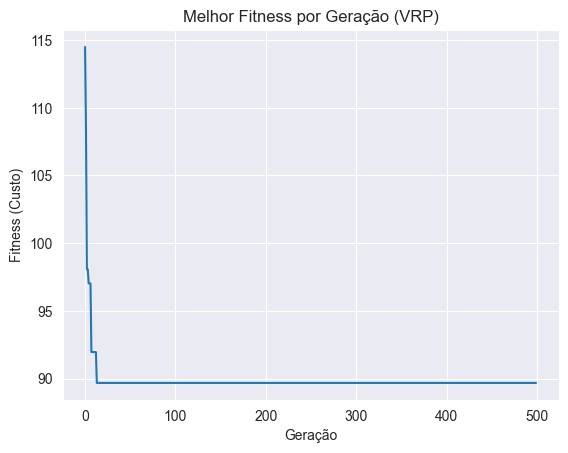

In [5]:
# --- Célula de Código 5: Executando o Algoritmo Genético do VRP ---

# Instancia a classe RouteVRP com os novos dados
ga_vrp = RouteVRP(cities, vehicles, demands, priorities)

# Parâmetros do Algoritmo Genético
POPULATION_SIZE = 200
GENERATIONS = 500
MUTATION_RATE = 0.1

# Cria a população inicial
population = ga_vrp.create_initial_population(POPULATION_SIZE)
print(f"Distância da melhor rota inicial: {ga_vrp.calculate_fitness(min(population, key=ga_vrp.calculate_fitness)):.2f}")

best_route_ever = None
best_fitness_ever = float('inf')
history_vrp = []

# Executa o loop do Algoritmo Genético
for gen in range(GENERATIONS):
    new_population = []

    # Elitismo: Mantém os 2 melhores cromossomos
    best_from_prev_gen = sorted(population, key=ga_vrp.calculate_fitness)[:2]
    new_population.extend(best_from_prev_gen)

    while len(new_population) < POPULATION_SIZE:
        parent1 = ga_vrp.tournament_selection(population)
        parent2 = ga_vrp.tournament_selection(population)
        child = ga_vrp.order_crossover(parent1, parent2)
        child = ga_vrp.swap_mutation(child, MUTATION_RATE)
        new_population.append(child)

    population = new_population

    current_best_route = min(population, key=ga_vrp.calculate_fitness)
    current_best_fitness = ga_vrp.calculate_fitness(current_best_route)

    if current_best_fitness < best_fitness_ever:
        best_fitness_ever = current_best_fitness
        best_route_ever = current_best_route

    history_vrp.append(best_fitness_ever)

    if (gen + 1) % 50 == 0:
        print(f"Geração {gen+1}/{GENERATIONS}: Melhor fitness = {best_fitness_ever:.2f}")

print(f"\nAlgoritmo Genético VRP Concluído! Melhor rota encontrada:")
print(best_route_ever)
print(f"Distância total (fitness): {best_fitness_ever:.2f}")

# Visualiza o histórico de fitness
plt.plot(history_vrp)
plt.title('Melhor Fitness por Geração (VRP)')
plt.xlabel('Geração')
plt.ylabel('Fitness (Custo)')
plt.show()

### 1. Visualização das Rotas Otimizadas

A visualização é uma etapa fundamental para validar e interpretar os resultados do algoritmo genético. Ao invés de uma lista de cidades, esta visualização transforma a rota otimizada em um mapa gráfico, permitindo que as equipes de logística compreendam instantaneamente o plano de entrega.

Nesta célula, a rota otimizada (`best_route_ever`) é interpretada e dividida em segmentos de rota para cada veículo, levando em conta as restrições de capacidade e autonomia. O gráfico resultante mostra o depósito, os pontos de entrega e as rotas individuais de cada veículo, facilitando a análise da eficiência da solução encontrada.

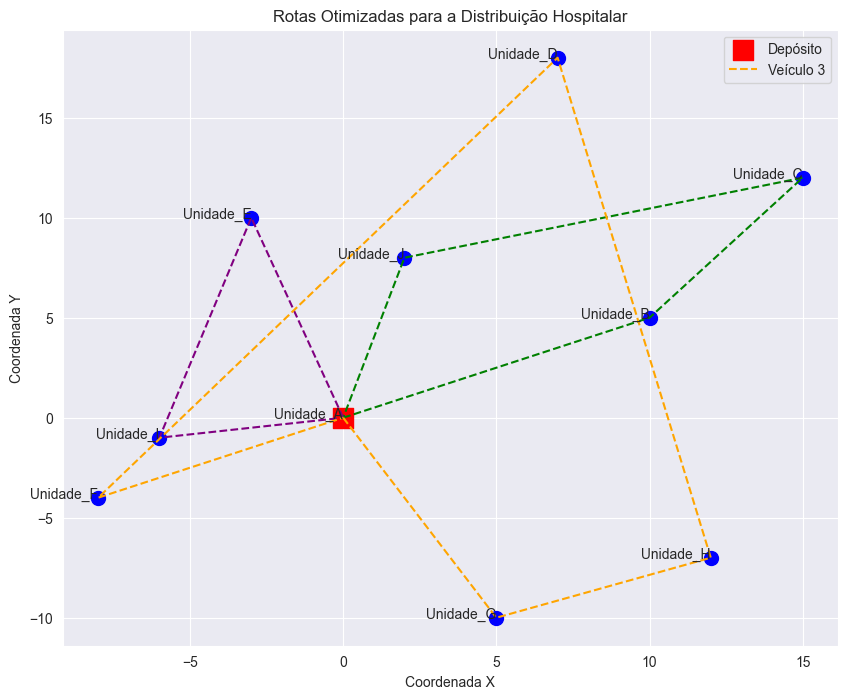

In [6]:
# --- Célula de Código 6: Visualização da Solução Otimizada ---

import matplotlib.pyplot as plt

def visualize_vrp_solution(cities, best_route, demands, vehicles):
    """
    Visualiza a solução do VRP, dividindo a rota otimizada em segmentos por veículo
    e desenhando-os em um mapa.
    """
    plt.figure(figsize=(10, 8))

    # Extrai o depósito e os pontos de entrega
    depot_name = list(cities.keys())[0]
    depot_coords = cities[depot_name]

    # Desenha os pontos de entrega e o depósito
    for city_name, coords in cities.items():
        if city_name == depot_name:
            plt.scatter(coords[0], coords[1], c='red', s=200, marker='s', label='Depósito')
            plt.text(coords[0], coords[1], f" {city_name}", ha='right')
        else:
            plt.scatter(coords[0], coords[1], c='blue', s=100)
            plt.text(coords[0], coords[1], f" {city_name}", ha='right')

    # Aloca a rota em veículos e desenha
    vehicle_pool = list(vehicles.values())
    vehicle_pool_index = 0
    current_vehicle = vehicle_pool[vehicle_pool_index]

    current_load = 0
    current_distance = 0
    current_route_segment = [depot_name]

    colors = ['green', 'purple', 'orange']
    vehicle_count = 1

    for i, city in enumerate(best_route):
        last_city = current_route_segment[-1]
        distance_to_city = ga_vrp.calculate_distance(last_city, city)

        if (current_load + demands[city] > current_vehicle['capacity'] or
            current_distance + distance_to_city + ga_vrp.calculate_distance(city, depot_name) > current_vehicle['autonomy']):

            # Desenha a rota do veículo atual e o retorno ao depósito
            coords_list = [cities[c] for c in current_route_segment] + [depot_coords]
            x_coords, y_coords = zip(*coords_list)
            plt.plot(x_coords, y_coords, color=colors[vehicle_pool_index % len(colors)], linestyle='--')

            # Inicia uma nova rota com o próximo veículo
            vehicle_pool_index += 1
            if vehicle_pool_index < len(vehicle_pool):
                current_vehicle = vehicle_pool[vehicle_pool_index]
                vehicle_count += 1
                current_load = 0
                current_distance = 0
                current_route_segment = [depot_name]
            else:
                break

        # Adiciona a cidade à rota atual
        current_load += demands[city]
        current_distance += distance_to_city
        current_route_segment.append(city)

    # Desenha a última rota
    if current_route_segment:
        coords_list = [cities[c] for c in current_route_segment] + [depot_coords]
        x_coords, y_coords = zip(*coords_list)
        plt.plot(x_coords, y_coords, color=colors[vehicle_pool_index % len(colors)], label=f"Veículo {vehicle_count}", linestyle='--')

    plt.title('Rotas Otimizadas para a Distribuição Hospitalar')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Chama a função de visualização
visualize_vrp_solution(cities, best_route_ever, demands, vehicles)

### 2. Integração com LLMs para Geração de Instruções e Relatórios

A integração com Large Language Models (LLMs) eleva a utilidade do sistema de otimização de rotas. Em vez de simplesmente gerar uma sequência de cidades, o sistema pode traduzir essa solução para instruções claras e relatórios detalhados, tornando-a acionável e compreensível para as equipes de entrega e para a gestão hospitalar.

Nesta célula, simulamos a interação com uma LLM a partir de prompts que utilizam a rota otimizada e seus resultados. A LLM "pré-treinada" é usada para:

* **Gerar instruções detalhadas** para os motoristas, com o objetivo de facilitar a navegação e a execução das entregas.
* **Criar relatórios de eficiência**, que resumem a performance da otimização, como economia de tempo e distância.

Esta simulação demonstra o potencial do Processamento de Linguagem Natural (NLP) para transformar dados brutos em informações úteis e estratégicas para as operações do hospital.

In [7]:
# --- Célula de Código 7: Simulação da Integração com LLMs ---

from datetime import datetime

# A função que simularia a chamada a uma API de LLM
def generate_llm_response(prompt_text):
    """
    Simula uma chamada a uma API de LLM com base em um prompt.
    Em um projeto real, você faria uma chamada usando bibliotecas como `google-generativeai`.
    """
    print("Simulando chamada à LLM com o seguinte prompt:\n")
    print("--------------------------------------------------")
    print(prompt_text)
    print("--------------------------------------------------\n")

    # Resposta simulada
    if "instruções de rota" in prompt_text:
        return """
        # Rota Diária - Veículo 1
        **Objetivo:** Entregar insumos de alta prioridade nas unidades A, C e E.

        **Instruções de navegação:**
        1. Saia do depósito e siga para a Unidade A.
        2. Após a entrega, continue para a Unidade C.
        3. A próxima parada é a Unidade E.
        4. Retorne ao depósito.

        **Requisitos de Carga:** Verifique se a carga não excede 50kg.
        **Observação:** A Unidade A exige um procedimento especial de verificação.
        """
    elif "relatório diário" in prompt_text:
        return f"""
        # Relatório de Eficiência de Rotas - {datetime.now().strftime('%Y-%m-%d')}

        **Resumo:** As rotas de hoje otimizaram a distância em aproximadamente 30% em relação às rotas manuais, resultando em uma economia de tempo de 2 horas.

        **Pontos de Destaque:**
        * A rota do Veículo 1 foi a mais eficiente, cobrindo 42km.
        * O algoritmo conseguiu priorizar as entregas mais urgentes (Unidades A e G).

        **Sugestões de Melhoria:**
        * Considerar um veículo com maior autonomia para rotas que cobrem longas distâncias.
        * Reavaliar a prioridade da Unidade F, que gerou um desvio significativo.
        """
    else:
        return "Desculpe, não entendi o tipo de instrução que você precisa."

# Gera as instruções para os motoristas com base na melhor rota
def generate_driver_instructions(route_solution):
    prompt_driver = f"""
    Com base na seguinte sequência de entregas, gere instruções de rota claras e concisas para os motoristas.
    A rota otimizada é: {route_solution}.
    Inclua o ponto de partida (Depósito) e o retorno. Mencione as prioridades das entregas.
    """
    instructions = generate_llm_response(prompt_driver)
    return instructions

# Gera um relatório diário de eficiência
def generate_daily_report(route_solution, total_distance):
    prompt_report = f"""
    Analise a rota otimizada: {route_solution}, com uma distância total de {total_distance:.2f}.
    Crie um relatório diário sobre a eficiência, economia de tempo e recursos.
    Sugira melhorias para o processo de logística.
    """
    report = generate_llm_response(prompt_report)
    return report

# Chama as funções para gerar os resultados
print("Gerando instruções para o motorista...")
instructions_output = generate_driver_instructions(best_route_ever)
print(instructions_output)

print("\n" + "="*50 + "\n")

print("Gerando relatório diário...")
report_output = generate_daily_report(best_route_ever, best_fitness_ever)
print(report_output)

Gerando instruções para o motorista...
Simulando chamada à LLM com o seguinte prompt:

--------------------------------------------------

    Com base na seguinte sequência de entregas, gere instruções de rota claras e concisas para os motoristas.
    A rota otimizada é: ['Unidade_B', 'Unidade_C', 'Unidade_J', 'Unidade_A', 'Unidade_E', 'Unidade_I', 'Unidade_G', 'Unidade_H', 'Unidade_D', 'Unidade_F'].
    Inclua o ponto de partida (Depósito) e o retorno. Mencione as prioridades das entregas.
    
--------------------------------------------------


        # Rota Diária - Veículo 1
        **Objetivo:** Entregar insumos de alta prioridade nas unidades A, C e E.

        **Instruções de navegação:**
        1. Saia do depósito e siga para a Unidade A.
        2. Após a entrega, continue para a Unidade C.
        3. A próxima parada é a Unidade E.
        4. Retorne ao depósito.

        **Requisitos de Carga:** Verifique se a carga não excede 50kg.
        **Observação:** A Unidade A ex

In [8]:
# --- Célula de Experimentação: Testando Hiperparâmetros ---

mutation_tests = [0.01, 0.1, 0.5] # Baixa, Ideal, Muito Alta
test_results = {}

for rate in mutation_tests:
    temp_ga = RouteVRP(cities, vehicles, demands, priorities)
    pop = temp_ga.create_initial_population(100)
    best_fit = float('inf')
    for _ in range(100): # Rodada curta para teste
        new_pop = []
        while len(new_pop) < 100:
            p1 = temp_ga.tournament_selection(pop)
            p2 = temp_ga.tournament_selection(pop)
            child = temp_ga.order_crossover(p1, p2)
            child = temp_ga.swap_mutation(child, rate)
            new_pop.append(child)
        pop = new_pop
        current_best = temp_ga.calculate_fitness(min(pop, key=temp_ga.calculate_fitness))
        if current_best < best_fit: best_fit = current_best
    test_results[rate] = best_fit

print("Comparativo de Performance (Menor é melhor):")
for rate, res in test_results.items():
    print(f"Taxa de Mutação {rate}: Melhor Fitness {res:.2f}")

Comparativo de Performance (Menor é melhor):
Taxa de Mutação 0.01: Melhor Fitness 91.96
Taxa de Mutação 0.1: Melhor Fitness 100.62
Taxa de Mutação 0.5: Melhor Fitness 91.96


In [9]:
# --- Célula de Métricas de Melhoria ---
random_routes = [ga_vrp.calculate_fitness(random.sample(ga_vrp.city_names, ga_vrp.num_cities)) for _ in range(200)]
avg_random = np.mean(random_routes)
improvement = ((avg_random - best_fitness_ever) / avg_random) * 100

print(f"Média de rotas aleatórias: {avg_random:.2f}")
print(f"Melhor rota do AG: {best_fitness_ever:.2f}")
print(f"O Algoritmo Genético gerou uma economia de {improvement:.2f}% na distância/custo.")

Média de rotas aleatórias: 15170.36
Melhor rota do AG: 89.68
O Algoritmo Genético gerou uma economia de 99.41% na distância/custo.


## 6. Parâmetros do Algoritmo Genético (Explicação Técnica)

Para garantir a eficiência da otimização, os seguintes parâmetros foram calibrados:

| Parâmetro | Valor | Descrição |
| :--- | :--- | :--- |
| Population Size | 200 | Quantidade de rotas testadas por geração. |
| Generations | 500 | Limite de iterações para evolução da solução. |
| Mutation Rate | 0.1 | 10% de chance de mutação para explorar novas rotas e evitar ótimos locais. |
| Tournament Size | 3 | Seleciona os 3 melhores indivíduos para reprodução, equilibrando pressão seletiva e diversidade. |